In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import tensorflow as tf
import cv2
from google.cloud import storage
import io
from PIL import Image


from scipy.signal import convolve2d
import scipy.misc
import argparse
import os
from glob import glob
import pyamg

import sys, os, inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(2,parentdir) 
from model.inpainting import *
from model.image_utils import *

In [2]:
# Inpainting Model
model = ModelInpaint(modelfilename = '', 
                     iters=200, l =0.1, learning_rate=0.0001,
                      momentum=0.02,
                      model_name='dcgan',
                      gen_input='inputs/z:0',
                     gen_output='Generator/tanh_fake:0', 
                     gen_loss='generator_loss:0',
                      disc_input='inputs/real:0', 
                     disc_output='Discriminator/sigmoid_real:0',
                      z_dim=100, batch_size=128)

INFO:tensorflow:Restoring parameters from ../CelebA/checkpoints/DCGAN.ckpt


In [3]:
# Generate some samples from the model as a test
imout = model.sample()   

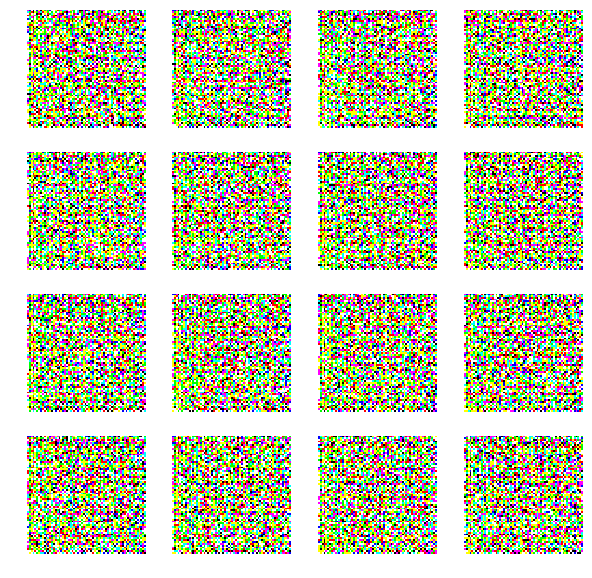

In [4]:
# Printing generator image from model
images = [cv2.normalize(i, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F).astype(np.uint8) for i in imout]
img_col = ImageCollector(np.asarray(images))
img_col.show(np.asarray(images))

In [5]:
# Read images
path = '/home/ecbm4040/data/celebA'
test_images = load_images_from_local(path, True, 128)

In [6]:
# Choose mask
mask = gen_mask('left')

In [7]:
#img.shape
img = test_images[0]

In [8]:
inpaint_out, g_out = model.inpaint(test_images, mask, blend=True)

Iteration 0: loss 0.5277412533760071, context 0.5007648468017578, g loss 0.26976388692855835
Iteration 1: loss 0.6251564025878906, context 0.48684161901474, g loss 1.3831485509872437
Iteration 2: loss 0.6427624225616455, context 0.4719885289669037, g loss 1.7077388763427734
Iteration 3: loss 0.629206120967865, context 0.47692379355430603, g loss 1.5228259563446045
Iteration 4: loss 0.48492544889450073, context 0.4547356069087982, g loss 0.30189844965934753
Iteration 5: loss 0.5568077564239502, context 0.4738806486129761, g loss 0.829271137714386
Iteration 6: loss 0.5602378845214844, context 0.49055057764053345, g loss 0.6968734860420227
Iteration 7: loss 0.6369283199310303, context 0.4920148551464081, g loss 1.4491345882415771
Iteration 8: loss 0.6514260768890381, context 0.4912625253200531, g loss 1.6016430854797363
Iteration 9: loss 0.5071631669998169, context 0.487509548664093, g loss 0.1965346336364746
Iteration 10: loss 0.5301194787025452, context 0.48058396577835083, g loss 0.495

Iteration 88: loss 0.6183788776397705, context 0.4851871728897095, g loss 1.3319166898727417
Iteration 89: loss 0.5388484001159668, context 0.5002552270889282, g loss 0.3859318196773529
Iteration 90: loss 0.4878523349761963, context 0.47171103954315186, g loss 0.1614130288362503
Iteration 91: loss 0.5911608934402466, context 0.4872399866580963, g loss 1.0392093658447266
Iteration 92: loss 0.5032771825790405, context 0.4823274612426758, g loss 0.2094971239566803
Iteration 93: loss 0.5298857092857361, context 0.48290616273880005, g loss 0.4697948098182678
Iteration 94: loss 0.517589807510376, context 0.4800790548324585, g loss 0.37510770559310913
Iteration 95: loss 0.5277008414268494, context 0.48570677638053894, g loss 0.4199402928352356
Iteration 96: loss 0.564531683921814, context 0.47781962156295776, g loss 0.8671205043792725
Iteration 97: loss 0.48861896991729736, context 0.47038447856903076, g loss 0.18234482407569885
Iteration 98: loss 0.6766223907470703, context 0.510770082473754

Iteration 176: loss 0.5254098773002625, context 0.48113059997558594, g loss 0.4427928030490875
Iteration 177: loss 0.5568166971206665, context 0.49078938364982605, g loss 0.6602723002433777
Iteration 178: loss 0.5042479038238525, context 0.47047942876815796, g loss 0.3376847803592682
Iteration 179: loss 0.5886120796203613, context 0.48783648014068604, g loss 1.0077564716339111
Iteration 180: loss 0.530689001083374, context 0.48963528871536255, g loss 0.4105372428894043
Iteration 181: loss 0.5357135534286499, context 0.5167040824890137, g loss 0.19009390473365784
Iteration 182: loss 0.4934121370315552, context 0.4751362204551697, g loss 0.18275952339172363
Iteration 183: loss 0.5233427286148071, context 0.47204241156578064, g loss 0.513003408908844
Iteration 184: loss 0.5446262359619141, context 0.4981764554977417, g loss 0.464497447013855
Iteration 185: loss 0.6276235580444336, context 0.4832526743412018, g loss 1.4437090158462524
Iteration 186: loss 0.6457997560501099, context 0.49260

In [9]:
len(inpaint_out)

128

In [10]:
outdir = '../CelebA/inpaint/'
saveimages(g_out, outdir, 'gen')
saveimages(inpaint_out, outdir, 'inpaint')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

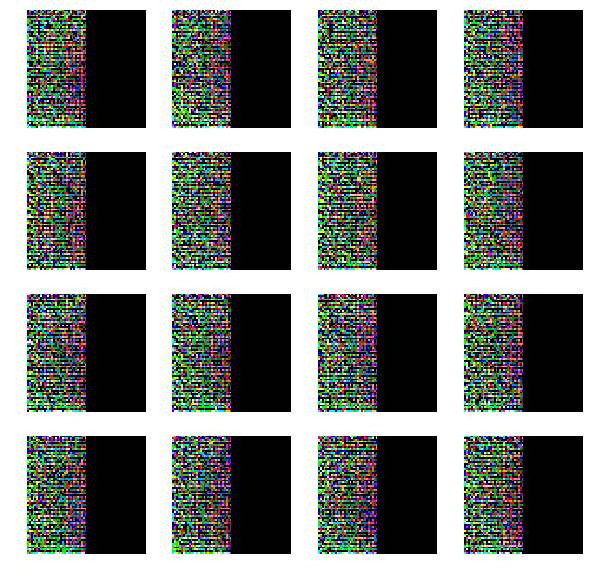

In [11]:
# Plot images generator with mask 
images = [cv2.normalize(i, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F).astype(np.uint8) for i in inpaint_out]
img_col = ImageCollector(np.asarray(images))
img_col.show(inpaint_out)